Loading GIF: /home/-Project-Group-B1/results/plots/DMSO_CH0_segmentation.gif
Loading background image: /home/-Project-Group-B1/data/processed/DMSO/CH0/MCF7_AREG_DMSO_020_ch0_projection.tif

Displaying superimposed image...


/tmp/ipykernel_106527/2757518546.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  is_outline = (frame[:, :, 0] > 200) & (frame[:, :, 1] > 200) & (frame[:, :, 2] < 50)
/tmp/ipykernel_106527/2757518546.py:29: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  master_outline_mask = np.logical_or(master_outline_mask, is_outline)


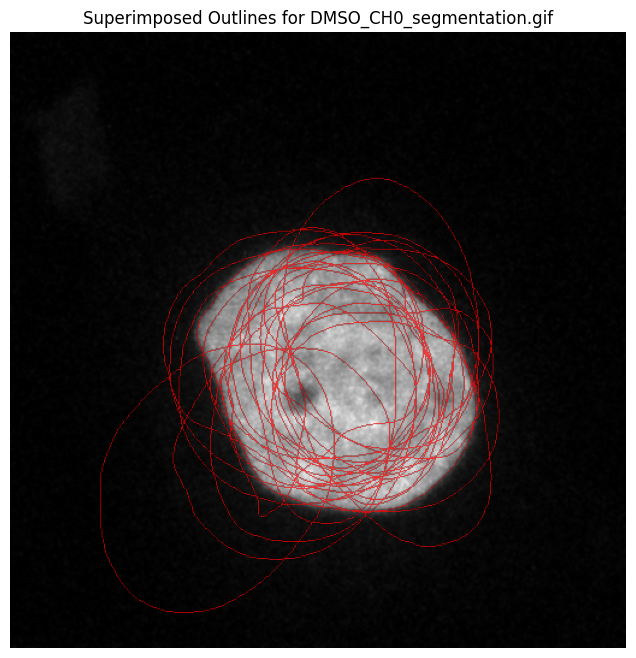

In [ ]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import imageio.v2 as imageio

PROJECT_ROOT_PATH = "/home/-Project-Group-B1"

CONDITION = "DMSO"
CHANNEL = "CH0"
BACKGROUND_IMAGE_NAME = f"MCF7_AREG_{CONDITION}_020_ch0_projection.tif"

GIF_NAME = f"{CONDITION}_{CHANNEL}_segmentation.gif"
GIF_PATH = os.path.join(PROJECT_ROOT_PATH, "results", "plots", GIF_NAME)
BACKGROUND_IMAGE_PATH = os.path.join(PROJECT_ROOT_PATH, "data", "processed", CONDITION, CHANNEL, BACKGROUND_IMAGE_NAME)

print(f"Loading GIF: {GIF_PATH}")
print(f"Loading background image: {BACKGROUND_IMAGE_PATH}")

try:
    gif_reader = imageio.get_reader(GIF_PATH)
    background_image = tifffile.imread(BACKGROUND_IMAGE_PATH)

    master_outline_mask = np.zeros(background_image.shape, dtype=bool)

    for frame in gif_reader:
        is_outline = (frame[:, :, 0] > 200) & (frame[:, :, 1] > 200) & (frame[:, :, 2] < 50)
        master_outline_mask = np.logical_or(master_outline_mask, is_outline)
        
    red_overlay = np.zeros((*background_image.shape, 4), dtype=float)
    red_overlay[master_outline_mask] = [1, 0, 0, 0.7]
    
    print("\nDisplaying superimposed image...")
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(background_image, cmap='gray')
    ax.imshow(red_overlay)
    ax.set_title(f"Superimposed Outlines for {GIF_NAME}")
    ax.set_axis_off()
    plt.show()

except FileNotFoundError as e:
    print(f"\nERROR: Could not find a required file. Please check paths. Details: {e}")
except Exception as e:
    print(f"\nAn error occurred: {e}")